In [1]:
# For the following problems, use python to simulate the problem and calculate an experimental probability, 
# then compare that to the theoretical probability.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# A bank found that the average number of cars waiting during the noon hour at a drive-up window
# follows a Poisson distribution with a mean of 2 cars. 
# Make a chart of this distribution and 
# answer these questions concerning the probability of cars waiting at the drive-up window.
dist = stats.poisson(2)

In [3]:
# What is the probability that no cars drive up in the noon hour?
round(dist.pmf(0), 2)

0.14

In [4]:
# What is the probability that 3 or more cars come through the drive through?
round(dist.sf(3) + dist.pmf(3), 2)

0.32

In [5]:
# How likely is it that the drive through gets at least 1 car?
round(dist.sf(1) + dist.pmf(1), 2)

0.86

In [157]:
# Grades of State University graduates are 
# normally distributed with a mean of 3.0 and a standard deviation of .3.
dist = stats.norm(3, 0.3)

In [158]:
# What grade point average is required to be in the top 5% of the graduating class?
round(dist.isf(0.05), 2)

3.49

In [159]:
# What GPA constitutes the bottom 15% of the class?
round(dist.ppf(0.15), 2)

2.69

In [161]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. 
round(dist.ppf(0.3) - dist.ppf(0.2), 2)

0.1

In [162]:
# Would a student with a 2.8 grade point average qualify for this scholarship?
print((2.8 > dist.ppf(0.2)) and (2.8 < dist.isf(0.3)))

True


In [11]:
# If I have a GPA of 3.5, what percentile am I in?
int(dist.cdf(3.5) * 100)

95

In [104]:
# A marketing website has an average click-through rate of 2%. 
# One day they observe 4326 visitors and 97 click-throughs. 
dist = stats.binom(4326, 0.02)

In [105]:
# How likely is it that this many people or more click through?
round(dist.sf(97) + dist.pmf(97), 2)

0.14

In [14]:
# You are working on some statistics homework consisting of 100 questions where 
# all of the answers are a probability rounded to the hundreths place. 
# Looking to save time, you put down random probabilities as the answer to each question.
# What is the probability that at least one of your first 60 answers is correct?
dist = stats.binom(60, 0.01)
round(dist.sf(1) + dist.pmf(1), 2)

0.45

In [15]:
# The codeup staff tends to get upset when the student break area is not cleaned up. 
# Suppose that there's a 3% chance that any one student cleans the break area when they visit it, 
# and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
# How likely is it that the break area gets cleaned up each day?
dist = stats.binom((22 * 3) * 0.9, 0.03)
round(dist.sf(0), 2)

0.83

In [16]:
# How likely is it that it goes two days without getting cleaned up? 
round(dist.pmf(0) * dist.pmf(0), 2)

0.03

In [17]:
# All week?
dist.pmf(0) ** 5

0.00011781621791055157

In [31]:
# You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
# After several weeks of careful observation, you notice that 
# the average number of people in line when your lunch break starts is normally distributed 
# with a mean of 15 and standard deviation of 3. 
dist = stats.norm(15, 3)

In [32]:
# If it takes 2 minutes for each person to order, 
# and 10 minutes from ordering to getting your food, 
# what is the likelihood that you have at least 15 minutes left to eat your food 
# before you have to go back to class? 
# Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

# 16 people is 32 minutes of waiting, then 12 minutes of ordering and waiting. The threshold is 16, if 17 then no.
round(dist.cdf(16), 2)

0.63

In [20]:
# Connect to the employees database
from env import host, username, password
def get_db_url(username, hostname, password, db_name):
    return f'mysql+pymysql://{username}:{password}@{hostname}/{db_name}'

url = get_db_url(username, host, password, 'employees')

In [21]:
# for salaries of current employees... along with the standard deviation. 
salaries = pd.read_sql('SELECT * FROM salaries WHERE to_date > curdate()', url)

In [22]:
salaries.describe

<bound method NDFrame.describe of         emp_no  salary   from_date     to_date
0        10001   88958  2002-06-22  9999-01-01
1        10002   72527  2001-08-02  9999-01-01
2        10003   43311  2001-12-01  9999-01-01
3        10004   74057  2001-11-27  9999-01-01
4        10005   94692  2001-09-09  9999-01-01
...        ...     ...         ...         ...
240119  499995   52868  2002-06-01  9999-01-01
240120  499996   69501  2002-05-12  9999-01-01
240121  499997   83441  2001-08-26  9999-01-01
240122  499998   55003  2001-12-25  9999-01-01
240123  499999   77303  2001-11-29  9999-01-01

[240124 rows x 4 columns]>

In [23]:
# ...find the average salary...
round(salaries['salary'].mean())

72012

In [24]:
# ...and the standard deviation of all salaries.
round(salaries['salary'].std())

17310

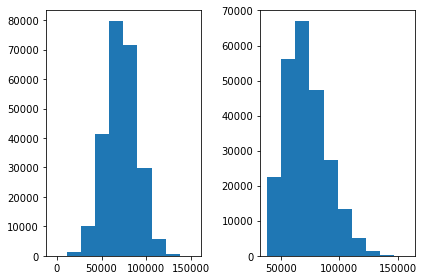

In [25]:
# For the following questions, 
# calculate the answer based on modeling the employees salaries with a normal distribution 
# defined by the calculated mean and standard deviation 
# then compare this answer to the actual values present in the salaries dataset.
dist = stats.norm(72012, 17310)
plt.subplot(121)
plt.hist(dist.rvs(240124))
plt.subplot(122)
plt.hist(salaries['salary'])
plt.tight_layout()
plt.show()

In [26]:
# What percent of employees earn less than 60,000?
round(len(salaries[salaries['salary'] < 60_000]) / len(salaries), 2)

0.27

In [27]:
# What percent of employees earn more than 95,000?
round(len(salaries[salaries['salary'] > 95_000]) / len(salaries), 2)

0.11

In [28]:
# What percent of employees earn between 65,000 and 80,000?
round(
    len(salaries[(salaries['salary'] > 65_000) & (salaries['salary'] < 80_000)]
    ) / len(salaries), 2)

0.33

In [29]:
# What do the top 5% of employees make?
# interpreting as "on average"
round((salaries['salary'].quantile(0.95) + salaries['salary'].max()) / 2)

131223

# Answer the above questions using approximation

(array([1354., 2701., 2650., 1859.,  920.,  352.,  114.,   38.,    8.,
           4.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

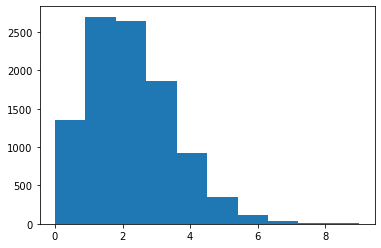

In [57]:
# Poisson distribution of waiting cars at noon with mean = 2 cars
cars = np.random.poisson(2, 10_000)
plt.hist(cars)

In [150]:
# What is the probability that no cars drive up in the noon hour?
round((cars == 0).mean(), 2)

0.14

In [151]:
# What is the probability that 3 or more cars come through the drive through?
round((cars >= 3).mean(), 2)

0.33

In [152]:
# How likely is it that the drive through gets at least 1 car?
round((cars >= 1).mean(), 2)

0.86

(array([  23.,  134.,  598., 1687., 2685., 2572., 1579.,  594.,  110.,
          18.]),
 array([1.91102215, 2.13101853, 2.35101491, 2.5710113 , 2.79100768,
        3.01100406, 3.23100045, 3.45099683, 3.67099322, 3.8909896 ,
        4.11098598]),
 <BarContainer object of 10 artists>)

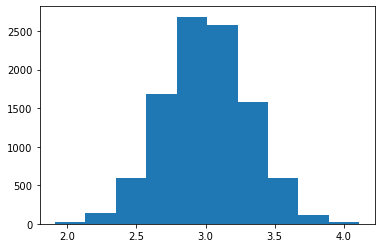

In [62]:
# Normal distribution of grades with mean = 3.0 and standard deviation = 0.3
grades = np.random.normal(3.0, 0.3, 10_000)
plt.hist(grades)

In [77]:
# What grade point average is required to be in the top 5% of the graduating class?
round(np.percentile(grades, 95), 2)

3.5

In [78]:
# What GPA constitutes the bottom 15% of the class?
round(np.percentile(grades, 15), 2)

2.69

In [164]:
# Grade range of third decile
round(np.percentile(grades, 30) - np.percentile(grades, 20), 2)

0.09

In [165]:
# Is a grade of 2.8 in the third decile?
(2.8 > np.percentile(grades, 20)) and (2.8 < np.percentile(grades, 30))

True

In [89]:
# If I have a GPA of 3.5, what percentile am I in?
round(len(grades[grades <= 3.5]) / len(grades), 2)

0.95

(array([  34.,  251., 1085., 2366., 2904., 2343.,  774.,  188.,   51.,
           4.]),
 array([ 55. ,  62.2,  69.4,  76.6,  83.8,  91. ,  98.2, 105.4, 112.6,
        119.8, 127. ]),
 <BarContainer object of 10 artists>)

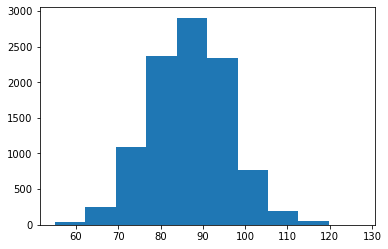

In [98]:
# A marketing website has an average click-through rate of 2%. 
# One day they observe 4326 visitors and 97 click-throughs. 
clickthru = np.random.binomial(4326, 0.02, 10_000)
plt.hist(clickthru)

In [112]:
# How likely is it that this many people or more click through?
round((clickthru >= 97).mean(), 2)

0.14

In [166]:
# Random numbers 1 - 100, what is the chance you guess right in 60 tries?
tries = np.random.choice((0,1), size=(10_000, 60), p=[0.99, 0.01])
round((tries.sum(axis=1) > 0).mean(), 2)

0.44

In [149]:
# 3% chance for any visiting student to clean, when 90% of 3 cohorts each with 22 students visit in a day
cleaners = np.random.choice((0,1), size=(10_000, (int(3 * 22 * 0.9))), p=[0.97, 0.03])

In [167]:
# Chance of room getting cleaned in one day
round((cleaners.sum(axis=1) > 0).mean(), 2)

0.83

In [122]:
# How likely is it that it goes two days without getting cleaned up? 
round((1 - ((cleaners.sum(axis=1) > 0).mean())) ** 2, 2)

0.03

In [124]:
# All week?
(1 - ((cleaners.sum(axis=1) > 0).mean())) ** 5

0.00011054779882387842

(array([  16.,  118.,  567., 1677., 2766., 2766., 1516.,  476.,   88.,
          10.]),
 array([ 3.92651937,  6.1832136 ,  8.43990783, 10.69660206, 12.95329629,
        15.20999052, 17.46668475, 19.72337898, 21.98007321, 24.23676743,
        26.49346166]),
 <BarContainer object of 10 artists>)

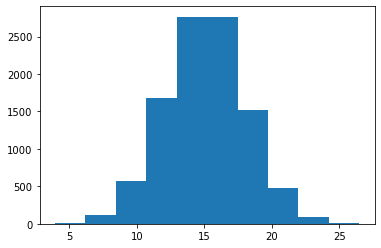

In [127]:
# Lunchline with normal distribution, mean = 15 people and standard deviation = 3
line = np.random.normal(15, 3, 10_000)
plt.hist(line)

In [129]:
# Likelihood of at most 16 people?
(line <= 16).mean()

0.6184

(array([  22.,  140.,  616., 1640., 2652., 2539., 1658.,  567.,  148.,
          18.]),
 array([ 10211.77654059,  22629.57571358,  35047.37488657,  47465.17405955,
         59882.97323254,  72300.77240553,  84718.57157852,  97136.3707515 ,
        109554.16992449, 121971.96909748, 134389.76827046]),
 <BarContainer object of 10 artists>)

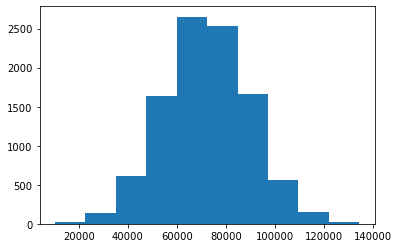

In [130]:
# Simulate employee salaries with mean = 72012 and standard deviation = 17310
sals = np.random.normal(72012, 17310, size=(10_000, 1))
plt.hist(sals)

In [142]:
# Percentage of salaries under $60,000
round((sals < 60000).mean(), 2)

0.24

In [141]:
# Percentage of salaries over $95,000
round((sals > 95000).mean(), 2)

0.09

In [140]:
# Percentage of salaries between $65,000 and $80,000
round(((sals > 65000) & (sals < 80000)).mean(), 2)

0.34

In [138]:
# Average of top 5% of salaries
int((sals.max() + np.percentile(sals, 95)) / 2)

117397